
### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

C:\Users\harsh\AppData\Local\Temp\ipykernel_1004\2669787077.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Import the dataset and read the file using pandas

In [2]:
df=pd.read_csv(r"C:\Users\harsh\Documents\Downloads\Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [4]:
df.shape

(2200, 8)

### Data Preprocessing and normalizing 

In [34]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [35]:
df.dropna(inplace=True)

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  
Indices of outliers:
Index(

<Axes: >

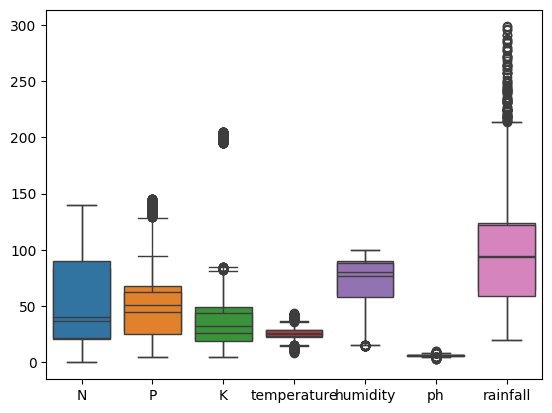

In [36]:
import pandas as pd
import seaborn as sns


# Convert relevant columns to numeric
numeric_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Display basic statistics of the dataset
print(df.describe())

# Visualize the distribution of each numerical attribute
sns.boxplot(data=df[numeric_cols])

# Detect outliers using statistical methods
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Print the indices of rows containing outliers
print("Indices of outliers:")
print(df[outliers].index)

# Decide whether to remove outliers or transform them using techniques like winsorization or scaling
# For example, to remove outliers:
df_no_outliers = df[~outliers]

# Or to winsorize outliers:
from scipy.stats.mstats import winsorize
df_winsorized = df.copy()
for col in numeric_cols:
    df_winsorized[col] = winsorize(df_winsorized[col], limits=[0.05, 0.05])

# Or to scale the data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])

# Visualize the distribution of each numerical attribute after handling outliers
sns.boxplot(data=df_no_outliers[numeric_cols])


In [37]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler, StandardScaler


# # Assuming 'your_dataset.csv' has numerical columns 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'

# # Extract numerical columns
# numeric_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
# numeric_data = df[numeric_cols]

# # Min-Max Scaling
# scaler_minmax = MinMaxScaler()
# scaled_data_minmax = scaler_minmax.fit_transform(numeric_data)
# df_scaled_minmax = pd.DataFrame(scaled_data_minmax, columns=numeric_cols)

# # Standardization (Z-score normalization)
# scaler_standard = StandardScaler()
# scaled_data_standard = scaler_standard.fit_transform(numeric_data)
# df_scaled_standard = pd.DataFrame(scaled_data_standard, columns=numeric_cols)

# # Display scaled data
# print("Min-Max Scaled Data:")
# print(df_scaled_minmax.head())

# print("\nStandardized (Z-score Normalized) Data:")
# print(df_scaled_standard.head())


In [38]:
# df1.describe()

In [39]:
df.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [40]:
 # x=df.iloc[:,0:7]
 # y=df.iloc[:,-1]
x = df.drop(columns=['label'])
y = df['label']

In [41]:
x[0:5]


,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [42]:
y[0:5]

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing to the whole dataset
X = preprocessor.fit_transform(df)

In [44]:
df.shape

(2200, 8)

### Train test Split and allocating the entropy and depth of the tree

In [45]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1760, 29) (1760,)
Test set: (440, 29) (440,)


In [47]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [48]:
y_pred = drugTree.predict(X_test)

In [49]:
print (y_pred [0:5])
print (y_test [0:5])

['rice' 'mango' 'chickpea' 'mungbean' 'chickpea']
2052           jute
357     kidneybeans
1784         papaya
694        mungbean
273        chickpea
Name: label, dtype: object


In [50]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.7022727272727273


In [51]:
# from sklearn.tree import export_graphviz
# export_graphviz(drugTree, out_file='tree.dot', filled=True, feature_names=['outlook','temp','humidity','windy'])
# !dot -Tpng tree.dot -o tree.png


In [52]:
X = df.drop('label', axis=1)
y = df['label']
# Check the number of features in your dataset
num_features = X.shape[1]

# Make sure the feature index is within the correct range
feature_index_to_plot = min(9, num_features - 1)  # Use min to ensure it's within the valid range

In [53]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [54]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [55]:
# Drop the 'label' column and ensure you're only using the 7 features
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Scale the data (only the 7 features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the DecisionTreeClassifier on the scaled 7 features
cropTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
cropTree.fit(X_train_scaled, y_train)

# Test the model (optional)
y_pred = cropTree.predict(X_test_scaled)
print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

# Now the model is trained with only the 7 features


DecisionTree's Accuracy:  0.7136363636363636


In [59]:
# # After the model is trained

# # Function to take user input and generate prediction
# def get_user_input_and_predict(model, scaler, columns):
#     print("Please enter the following values:")
    
#     # Taking input for all the required features
#     user_data = {}
#     for col in columns:
#         user_data[col] = float(input(f"Enter {col}: "))

#     # Convert the input into a pandas DataFrame
#     input_df = pd.DataFrame([user_data])

#     # Scale the input if necessary (assuming you are using scaling)
#     input_scaled = scaler.transform(input_df)

#     # Generate prediction
#     prediction = cropTree.predict(input_scaled)

#     # Display the result
#     print(f"The recommended crop based on the input data is: {prediction[0]}")

# # Define the feature columns (excluding 'label' as it's the target)
# feature_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# # Call the function to get user input and predict
# get_user_input_and_predict(drugTree, scaler, feature_columns)


Please enter the following values:


ValueError: could not convert string to float: ''

In [60]:
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Example dataset (replace this with your own)
# Assuming `df` is your DataFrame and 'label' is the target column
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]  # Features
y = df['label']  # Target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize the scaler and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Decision Tree model
cropTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
cropTree.fit(X_train_scaled, y_train)

# Save the trained model and scaler using joblib
joblib.dump(cropTree, 'crop_tree_model.pkl')   # Save the model
joblib.dump(scaler, 'scaler.pkl')              # Save the scaler


['scaler.pkl']

In [61]:
import joblib

# Load the saved model and scaler
model = joblib.load('crop_tree_model.pkl')
scaler = joblib.load('scaler.pkl')

# Now you can use the `model` and `scaler` for prediction


In [62]:
import threading
from flask import Flask, render_template, request
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib
import time

# Initialize Flask app
app = Flask(__name__)

# Load the trained model and scaler
model = joblib.load('crop_tree_model.pkl')  # Make sure the model file is in the right directory
scaler = joblib.load('scaler.pkl')

# Define the Flask routes
@app.route('/')
def home():
    return '''
        <h1>Crop Recommendation System</h1>
        <form action="/predict" method="POST">
            <label for="N">Nitrogen (N):</label><input type="text" name="N"><br>
            <label for="P">Phosphorus (P):</label><input type="text" name="P"><br>
            <label for="K">Potassium (K):</label><input type="text" name="K"><br>
            <label for="temperature">Temperature:</label><input type="text" name="temperature"><br>
            <label for="humidity">Humidity:</label><input type="text" name="humidity"><br>
            <label for="ph">pH:</label><input type="text" name="ph"><br>
            <label for="rainfall">Rainfall:</label><input type="text" name="rainfall"><br>
            <input type="submit" value="Predict Crop">
        </form>
    '''

@app.route('/predict', methods=['POST'])
def predict():
    # Get user inputs from the form
    N = float(request.form['N'])
    P = float(request.form['P'])
    K = float(request.form['K'])
    temperature = float(request.form['temperature'])
    humidity = float(request.form['humidity'])
    ph = float(request.form['ph'])
    rainfall = float(request.form['rainfall'])

    # Create a DataFrame for input
    input_data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]],
                              columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

    # Scale the input data
    input_scaled = scaler.transform(input_data)

    # Predict using the loaded model
    prediction = model.predict(input_scaled)

    # Return the prediction as an HTML response
    return f'<h1>Recommended Crop: {prediction[0]}</h1><a href="/">Go back</a>'

# Function to run Flask app in a thread
def run_flask():
    app.run(port=5000, debug=False, use_reloader=False)

# Start Flask app in a separate thread
flask_thread = threading.Thread(target=run_flask)
flask_thread.start()

# Give Flask a moment to start
time.sleep(1)

print("Flask app is running. Open http://127.0.0.1:5000 in your browser.")


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


Flask app is running. Open http://127.0.0.1:5000 in your browser.


In [63]:
import threading
from flask import Flask, render_template, request
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib
import time

# Initialize Flask app
app = Flask(__name__)

# Load the trained model and scaler
model = joblib.load('crop_tree_model.pkl')  # Make sure the model file is in the right directory
scaler = joblib.load('scaler.pkl')

# Define the Flask routes
@app.route('/')
def home():
    return '''
        <html>
            <head>
                <style>
                    body {
                        background-image: url('background.jpg');  /* Replace with your image file */
                        background-size: cover;
                        display: flex;
                        justify-content: center;
                        align-items: center;
                        height: 100vh;
                        margin: 0;
                        font-family: Arial, sans-serif;
                    }
                    .container {
                        background-color: rgba(255, 255, 255, 0.8);
                        padding: 20px;
                        border-radius: 8px;
                        box-shadow: 0 0 10px rgba(0, 0, 0, 0.3);
                        text-align: center;
                    }
                    form {
                        display: flex;
                        flex-direction: column;
                        gap: 15px;
                    }
                    input[type="text"], input[type="submit"] {
                        padding: 8px;
                        font-size: 16px;
                        width: 100%;
                    }
                    label {
                        margin-bottom: 5px;
                    }
                </style>
            </head>
            <body>
                <div class="container">
                    <h1>Crop Recommendation System</h1>
                    <form action="/predict" method="POST">
                        <label for="N">Nitrogen (N):</label>
                        <input type="text" name="N"><br>
                        <label for="P">Phosphorus (P):</label>
                        <input type="text" name="P"><br>
                        <label for="K">Potassium (K):</label>
                        <input type="text" name="K"><br>
                        <label for="temperature">Temperature:</label>
                        <input type="text" name="temperature"><br>
                        <label for="humidity">Humidity:</label>
                        <input type="text" name="humidity"><br>
                        <label for="ph">pH:</label>
                        <input type="text" name="ph"><br>
                        <label for="rainfall">Rainfall:</label>
                        <input type="text" name="rainfall"><br>
                        <input type="submit" value="Predict Crop">
                    </form>
                </div>
            </body>
        </html>
    '''

@app.route('/predict', methods=['POST'])
def predict():
    # Get user inputs from the form
    N = float(request.form['N'])
    P = float(request.form['P'])
    K = float(request.form['K'])
    temperature = float(request.form['temperature'])
    humidity = float(request.form['humidity'])
    ph = float(request.form['ph'])
    rainfall = float(request.form['rainfall'])

    # Create a DataFrame for input
    input_data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]],
                              columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

    # Scale the input data
    input_scaled = scaler.transform(input_data)

    # Predict using the loaded model
    prediction = model.predict(input_scaled)

    # Return the prediction as an HTML response
    return f'<h1>Recommended Crop: {prediction[0]}</h1><a href="/">Go back</a>'

# Function to run Flask app in a thread
def run_flask():
    app.run(port=5000, debug=False, use_reloader=False)

# Start Flask app in a separate thread
flask_thread = threading.Thread(target=run_flask)
flask_thread.start()

# Give Flask a moment to start
time.sleep(1)

print("Flask app is running. Open http://127.0.0.1:5000 in your browser.")


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


Flask app is running. Open http://127.0.0.1:5000 in your browser.


### finding the accuracy precision recall and f1- score

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')

recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.71
Precision: 0.71
Recall: 0.71
F1-score: 0.71


In [32]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

###  Finding the accuracy by k-fold and grid_search CV

In [33]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the model
model = DecisionTreeClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X, y)

# Print the best hyperparameters found
print("Best hyperparameters found:")
print(grid_search.best_params_)

# Print the best model's score
print("Best model score:", grid_search.best_score_)


Best hyperparameters found:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Best model score: 0.989090909090909


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['label'])
y = df['label']

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Instantiate the logistic regression model
model = LogisticRegression()
# Train the model on the training data
model.fit(X_train, y_train)

C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
# Predict the target variable on the testing data
y_pred = model.predict(X_test)

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9454545454545454
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.83      0.75      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.83      0.91      0.87        11
       maize       0.94      0.76      0.84        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.85      0.92      0.88        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      

In [39]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression()

# Define the grid of hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X, y)

# Print the best hyperparameters found
print("Best hyperparameters found:")
print(grid_search.best_params_)

# Print the best model's score
print("Best model score:", grid_search.best_score_)


C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
975 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\harsh\App

Best hyperparameters found:
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best model score: 0.9827272727272728


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')

recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1-score: 0.95


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [42]:
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [43]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:

# Choosing K
k = 5

# Training the KNN model
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:

# Predicting labels for test data
y_pred = knn_model.predict(X_test)

In [46]:
# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9659090909090909


In [47]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the model
model = KNeighborsClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X, y)

# Print the best hyperparameters found
print("Best hyperparameters found:")
print(grid_search.best_params_)

# Print the best model's score
print("Best model score:", grid_search.best_score_)


Best hyperparameters found:
{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best model score: 0.9831818181818182


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')

recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-score: 0.97


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [50]:
# Assuming X contains the features and y contains the target variable
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [51]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# y_train = scaler.fit_transform(y_train)
# y_test=scaler.transform(y_test)

In [52]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the target variable
y_train_encoded = label_encoder.fit_transform(y_train)


In [53]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train_encoded)


RandomForestRegressor(max_depth=10, random_state=42)

In [54]:
# Predict on the testing data
y_pred = rf_model.predict(X_test)


In [55]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the target variable
y_test_encoded = label_encoder.fit_transform(y_test)


In [56]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test_encoded, y_pred)

# Calculate R-squared
r2 = r2_score(y_test_encoded, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 2.07860821883799
R-squared: 0.9481043550655197


In [57]:
# After the model is trained

# Function to take user input and generate prediction
def get_user_input_and_predict(model, scaler, columns):
    print("Please enter the following values:")
    
    # Taking input for all the required features
    user_data = {}
    for col in columns:
        user_data[col] = float(input(f"Enter {col}: "))

    # Convert the input into a pandas DataFrame
    input_df = pd.DataFrame([user_data])

    # Scale the input if necessary (assuming you are using scaling)
    input_scaled = scaler.transform(input_df)

    # Generate prediction
    prediction = rf_model.predict(input_scaled)

    # Display the result
    print(f"The recommended crop based on the input data is: {prediction[0]}")

# Define the feature columns (excluding 'label' as it's the target)
feature_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Call the function to get user input and predict
get_user_input_and_predict(drugTree, scaler, feature_columns)

Please enter the following values:


Enter N:  45
Enter P:  45
Enter K:  45
Enter temperature:  45
Enter humidity:  55
Enter ph:  4
Enter rainfall:  78


The recommended crop based on the input data is: 7.041148459383753


In [56]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Define the model
model = RandomForestClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X, y)

# Print the best hyperparameters found
print("Best hyperparameters found:")
print(grid_search.best_params_)

# Print the best model's score
print("Best model score:", grid_search.best_score_)

Best hyperparameters found:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best model score: 0.9954545454545455


In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X is your feature matrix and y is your target vector
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the SVM classifier on the training data
svm_model.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9613636363636363


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  # Import Support Vector Classifier

# Define the model
model = SVC()

# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X, y)  # Ensure X and y are your feature matrix and target vector

# Print the best hyperparameters found
print("Best hyperparameters found:")
print(grid_search.best_params_)

# Print the best model's score
print("Best model score:", grid_search.best_score_)


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')

recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-score: 0.96


In [58]:
pip install Flask


  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)
Using cached flask-3.0.3-py3-none-any.whl (101 kB)
Using cached blinker-1.8.2-py3-none-any.whl (9.5 kB)
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\harsh\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [59]:
from flask import Flask, render_template, request
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Initialize the Flask app
app = Flask(__name__)

# Load the trained model and scaler
model = joblib.load('crop_tree_model.pkl')
scaler = joblib.load('scaler.pkl')

# Route for home page
@app.route('/')
def home():
    return render_template('index.html')

# Route for handling form submission and prediction
@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        # Get input values from the form
        N = float(request.form['N'])
        P = float(request.form['P'])
        K = float(request.form['K'])
        temperature = float(request.form['temperature'])
        humidity = float(request.form['humidity'])
        ph = float(request.form['ph'])
        rainfall = float(request.form['rainfall'])

        # Create a DataFrame for the input
        input_data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]],
                                  columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

        # Scale the input data
        input_scaled = scaler.transform(input_data)

        # Predict using the loaded model
        prediction = model.predict(input_scaled)

        # Render the result back to the webpage
        return render_template('result.html', prediction=prediction[0])

if __name__ == '__main__':
    app.run(debug=True)


FileNotFoundError: [Errno 2] No such file or directory: 'crop_tree_model.pkl'

In [60]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Crop Recommendation</title>
</head>
<body>
    <h1>Crop Recommendation System</h1>
    <form action="/predict" method="POST">
        <label for="N">Nitrogen (N):</label>
        <input type="text" name="N" required><br>

        <label for="P">Phosphorus (P):</label>
        <input type="text" name="P" required><br>

        <label for="K">Potassium (K):</label>
        <input type="text" name="K" required><br>

        <label for="temperature">Temperature:</label>
        <input type="text" name="temperature" required><br>

        <label for="humidity">Humidity:</label>
        <input type="text" name="humidity" required><br>

        <label for="ph">Soil pH:</label>
        <input type="text" name="ph" required><br>

        <label for="rainfall">Rainfall:</label>
        <input type="text" name="rainfall" required><br>

        <input type="submit" value="Predict Crop">
    </form>
</body>
</html>


SyntaxError: invalid syntax (3037357019.py, line 1)